In [271]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os

**Reading the Data set**

In [ ]:
data = pd.read_csv('StudentsPerformance.csv')
print(data.shape)

(1000, 8)


In [ ]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [ ]:
data.select_dtypes('object').nunique()

,0
gender,2
race/ethnicity,5
parental level of education,6
lunch,2
test preparation course,2


In [ ]:
no_of_columns = data.shape[0]
percentage_of_missing_data = data.isnull().sum()/no_of_columns
print(percentage_of_missing_data)

gender                         0.0
race/ethnicity                 0.0
parental level of education    0.0
lunch                          0.0
test preparation course        0.0
math score                     0.0
reading score                  0.0
writing score                  0.0
dtype: float64


In [277]:
total_students = data.shape[0]
students_score_more_than_50 = data[data['math score'] > 50].shape[0]

probability_of_students_scoring_more_than_50_in_maths = (students_score_more_than_50/total_students)*100
print("Probability of Students Scoring more than 50 marks in Maths :", probability_of_students_scoring_more_than_50_in_maths)

Probability of Students Scoring more than 50 marks in Maths : 85.0


In [278]:
total_students = data.shape[0]
students_score_more_than_50 = data[data['reading score'] > 50].shape[0]

probability_of_students_scoring_more_than_50_in_reading = (students_score_more_than_50/total_students)*100
print("Probability of Students Scoring more than 50 marks in Reading :", probability_of_students_scoring_more_than_50_in_reading)

Probability of Students Scoring more than 50 marks in Reading : 90.3


In [279]:
total_students = data.shape[0]
students_score_more_than_50 = data[data['writing score'] > 50].shape[0]

probability_of_students_scoring_more_than_50_in_writing = (students_score_more_than_50/total_students)*100
print("Probability of Students Scoring more than 50 marks in Writing :", probability_of_students_scoring_more_than_50_in_writing)

Probability of Students Scoring more than 50 marks in Writing : 87.6


In [280]:
total_students = data.shape[0]
number_of_students_passing_in_all_subjects = data[(data['math score'] > 40) &
                                                  (data['writing score'] > 40) &
                                                  (data['reading score'] > 40)].shape[0]
probability_of_students_passing_in_all_the_subjects = (number_of_students_passing_in_all_subjects/total_students)*100
print("The Probability of Students Passing in all the Subjects is {0:.2f} %".format(probability_of_students_passing_in_all_the_subjects))

The Probability of Students Passing in all the Subjects is 93.90 %


In [281]:
total_students = data.shape[0]
number_of_students_scoring_more_than_90 = data[(data['math score'] > 90) &
                                                  (data['writing score'] > 90) &
                                                  (data['reading score'] > 90)].shape[0]

probability_of_students_scoring_more_than_90_in_all_subjects = (number_of_students_scoring_more_than_90/total_students)*100
print("The Probability of Students Passing in all the Subjects is {0:.2f} %".
      format(probability_of_students_scoring_more_than_90_in_all_subjects))

The Probability of Students Passing in all the Subjects is 2.30 %


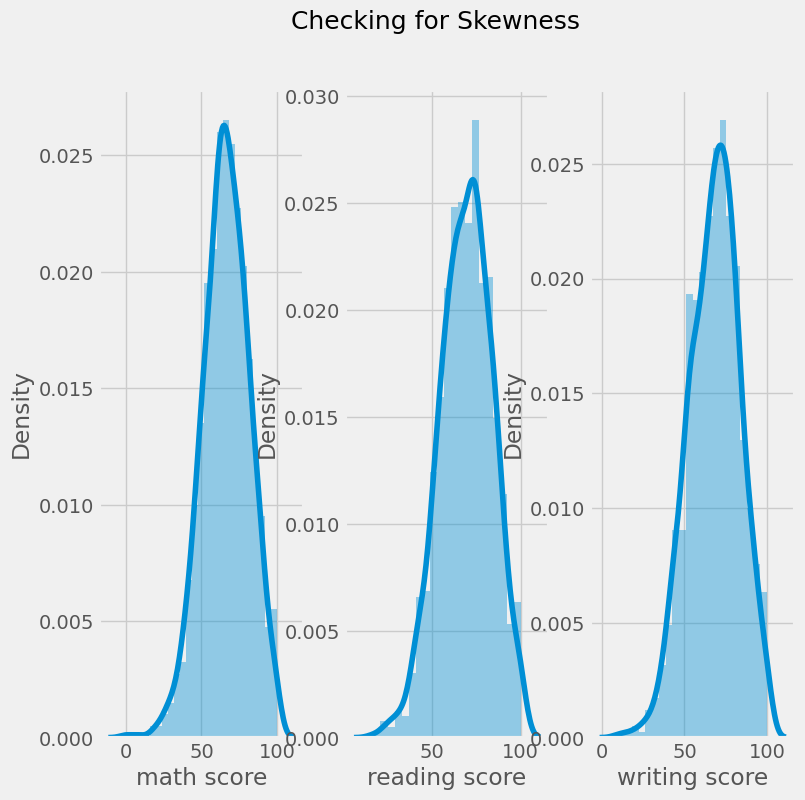

In [282]:
plt.subplot(1, 3, 1)
sns.distplot(data['math score'])

plt.subplot(1, 3, 2)
sns.distplot(data['reading score'])

plt.subplot(1, 3, 3)
sns.distplot(data['writing score'])

plt.suptitle('Checking for Skewness', fontsize = 18)
plt.show()

In [ ]:
np.random.seed(6)
sample_math_marks = np.random.choice(a= data['math score'], size=100)
print ("Sample mean for Math Scores:", sample_math_marks.mean() )
print("Population mean for Math Scores:", data['math score'].mean())
sample_reading_marks = np.random.choice(a= data['reading score'], size=100)
print ("\nSample mean for Reading Scores:", sample_reading_marks.mean() )
print("Population mean for Reading Scores:", data['reading score'].mean())
sample_writing_marks = np.random.choice(a= data['writing score'], size=100)
print ("\nSample mean for Writing Scores:", sample_math_marks.mean() )
print("Population mean for Writing Scores:", data['writing score'].mean())

Sample mean for Math Scores: 63.12
Population mean for Math Scores: 66.089

Sample mean for Reading Scores: 68.5
Population mean for Reading Scores: 69.169

Sample mean for Writing Scores: 63.12
Population mean for Writing Scores: 68.054


In [ ]:
import scipy.stats as stats
import math

np.random.seed(10)
sample_size = 1000
sample = np.random.choice(a= data['math score'],
                          size = sample_size)
sample_mean = sample.mean()
z_critical = stats.norm.ppf(q = 0.95)
print("z-critical value: ",z_critical)
pop_stdev = data['math score'].std()
margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size))
confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)
print("Confidence interval:",end=" ")
print(confidence_interval)
print("True mean: {}".format(data['math score'].mean()))

z-critical value:  1.6448536269514722
Confidence interval: (np.float64(64.82729483328328), np.float64(66.40470516671672))
True mean: 66.089


In [ ]:
import scipy.stats as stats
import math


np.random.seed(10)
sample_size = 1000
sample = np.random.choice(a= data['reading score'],
                          size = sample_size)
sample_mean = sample.mean()
z_critical = stats.norm.ppf(q = 0.95)
print("z-critical value: ",z_critical)
pop_stdev = data['reading score'].std()
margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size))
confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)
print("Confidence interval:",end=" ")
print(confidence_interval)
print("True mean: {}".format(data['reading score'].mean()))

z-critical value:  1.6448536269514722
Confidence interval: (np.float64(67.75757337011645), np.float64(69.27642662988355))
True mean: 69.169


In [ ]:
np.random.seed(10)
sample_size = 1000
sample = np.random.choice(a= data['writing score'],
                          size = sample_size)
sample_mean = sample.mean()
z_critical = stats.norm.ppf(q = 0.95)
print("z-critical value: ",z_critical)
pop_stdev = data['writing score'].std()
margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size))
confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)
print("Confidence interval:",end=" ")
print(confidence_interval)
print("True mean: {}".format(data['writing score'].mean()))

z-critical value:  1.6448536269514722
Confidence interval: (np.float64(66.80960035030861), np.float64(68.39039964969137))
True mean: 68.054


In [287]:
data[(data['gender'] == 'female') &
     (data['math score'] > 90) &
     (data['writing score'] > 90) &
     (data['reading score'] > 90)]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
114,female,group E,bachelor's degree,standard,completed,99,100,100
165,female,group C,bachelor's degree,standard,completed,96,100,100
179,female,group D,some high school,standard,completed,97,100,100
451,female,group E,some college,standard,none,100,92,97
458,female,group E,bachelor's degree,standard,none,100,100,100
546,female,group A,some high school,standard,completed,92,100,97
566,female,group E,bachelor's degree,free/reduced,completed,92,100,100
594,female,group C,bachelor's degree,standard,completed,92,100,99
685,female,group E,master's degree,standard,completed,94,99,100
712,female,group D,some college,standard,none,98,100,99


In [288]:
data.groupby(['gender'])[['math score', 'reading score', 'writing score']].agg(['min','median','max'])

math score             reading score             writing score         \
              min median  max           min median  max           min median   
gender                                                                         
female          0   65.0  100            17   73.0  100            10   74.0   
male           27   69.0  100            23   66.0  100            15   64.0   

             
        max  
gender       
female  100  
male    100

In [289]:
data[['lunch','gender','math score','writing score','reading score']].groupby(['lunch','gender']).agg('median')

math score  writing score  reading score
lunch        gender                                          
free/reduced female        57.0           68.0           67.0
             male          62.0           59.0           61.0
standard     female        67.0           76.0           75.0
             male          72.0           67.0           67.5

In [290]:
data[['test preparation course',
      'gender',
      'math score',
      'writing score',
      'reading score']].groupby(['test preparation course','gender']).agg('median')

math score  writing score  reading score
test preparation course gender                                          
completed               female        67.0           79.0           78.0
                        male          73.0           70.0           71.0
none                    female        62.0           70.0           71.0
                        male          67.0           60.0           63.0

In [291]:
data[['race/ethnicity',
      'math score',
      'writing score',
      'reading score']].groupby(['race/ethnicity']).agg('median')

,math score,writing score,reading score
race/ethnicity,,,
group A,61.0,62.0,64.0
group B,63.0,67.0,67.0
group C,65.0,68.0,71.0
group D,69.0,72.0,71.0
group E,74.5,72.0,74.0


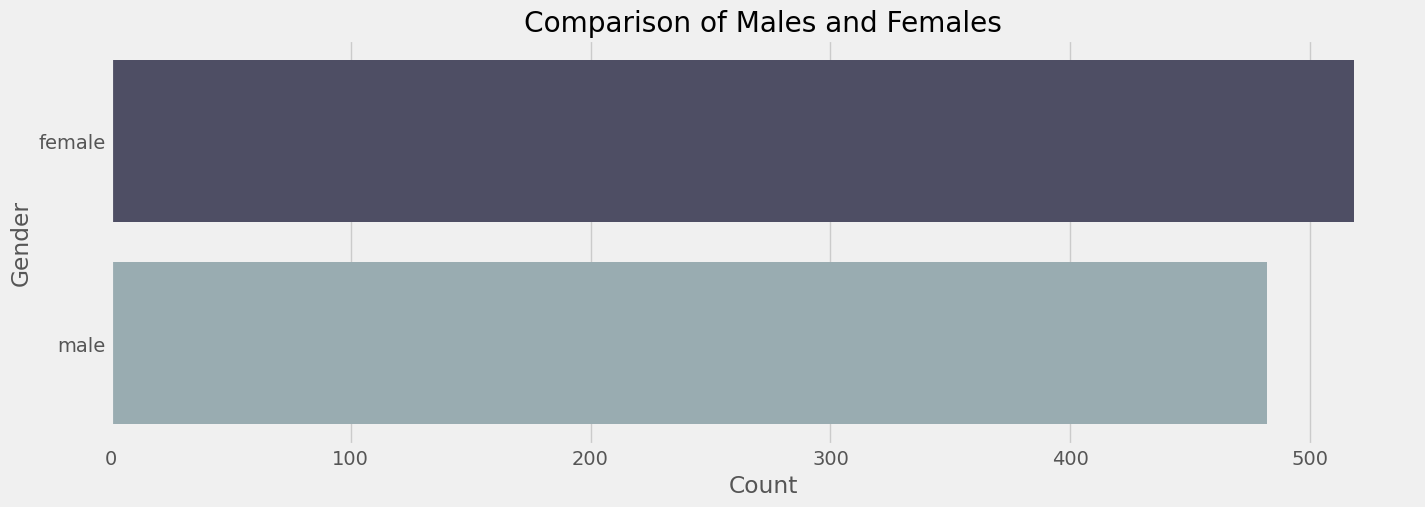

In [ ]:
plt.rcParams['figure.figsize'] = (15, 5)
sns.countplot(y='gender', data=data, palette='bone')
plt.title('Comparison of Males and Females', fontweight = 30)
plt.xlabel('Count')
plt.ylabel('Gender')
plt.show()

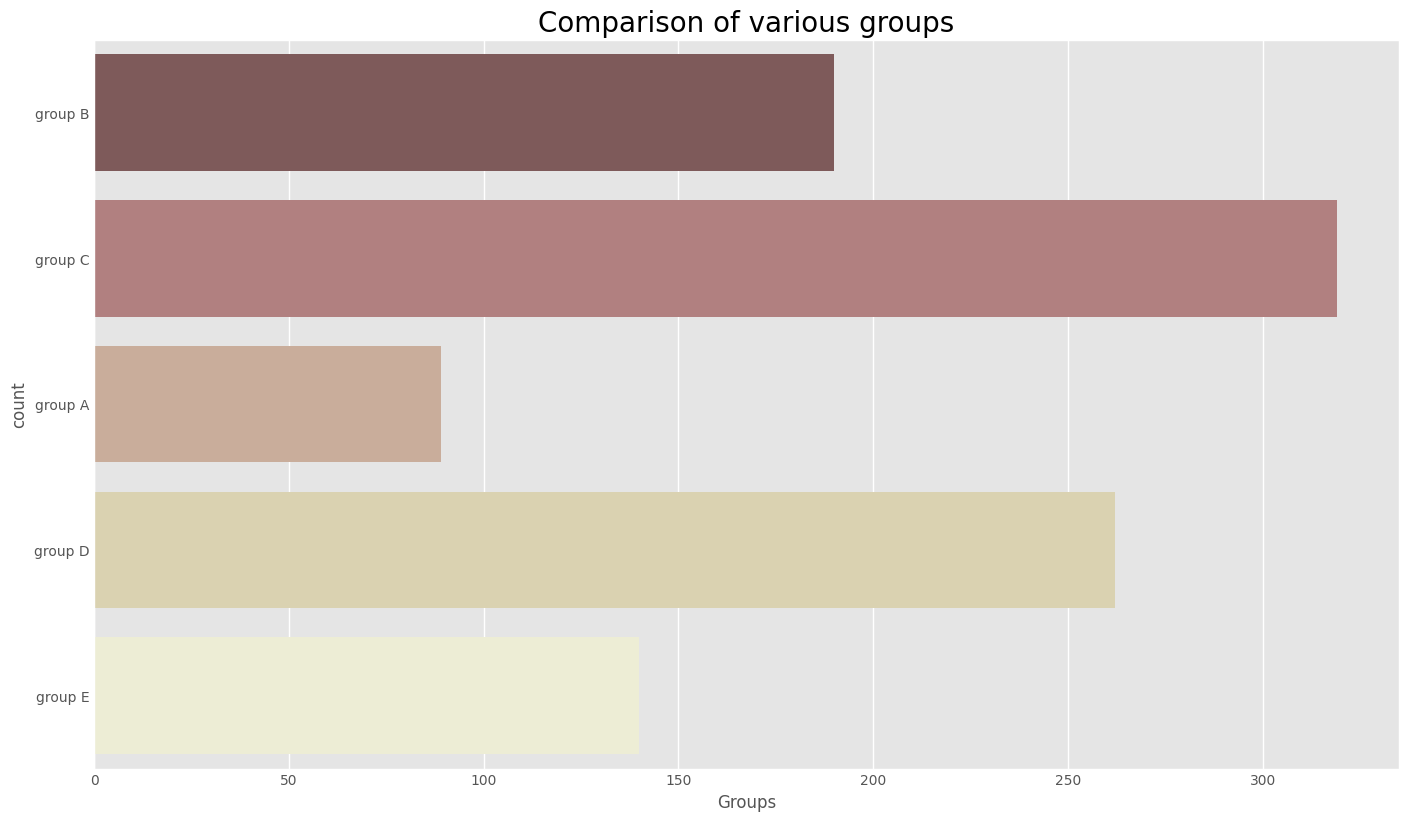

In [ ]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('ggplot')
sns.countplot(data['race/ethnicity'], palette = 'pink')
plt.title('Comparison of various groups', fontweight = 30, fontsize = 20)
plt.xlabel('Groups')
plt.ylabel('count')
plt.show()

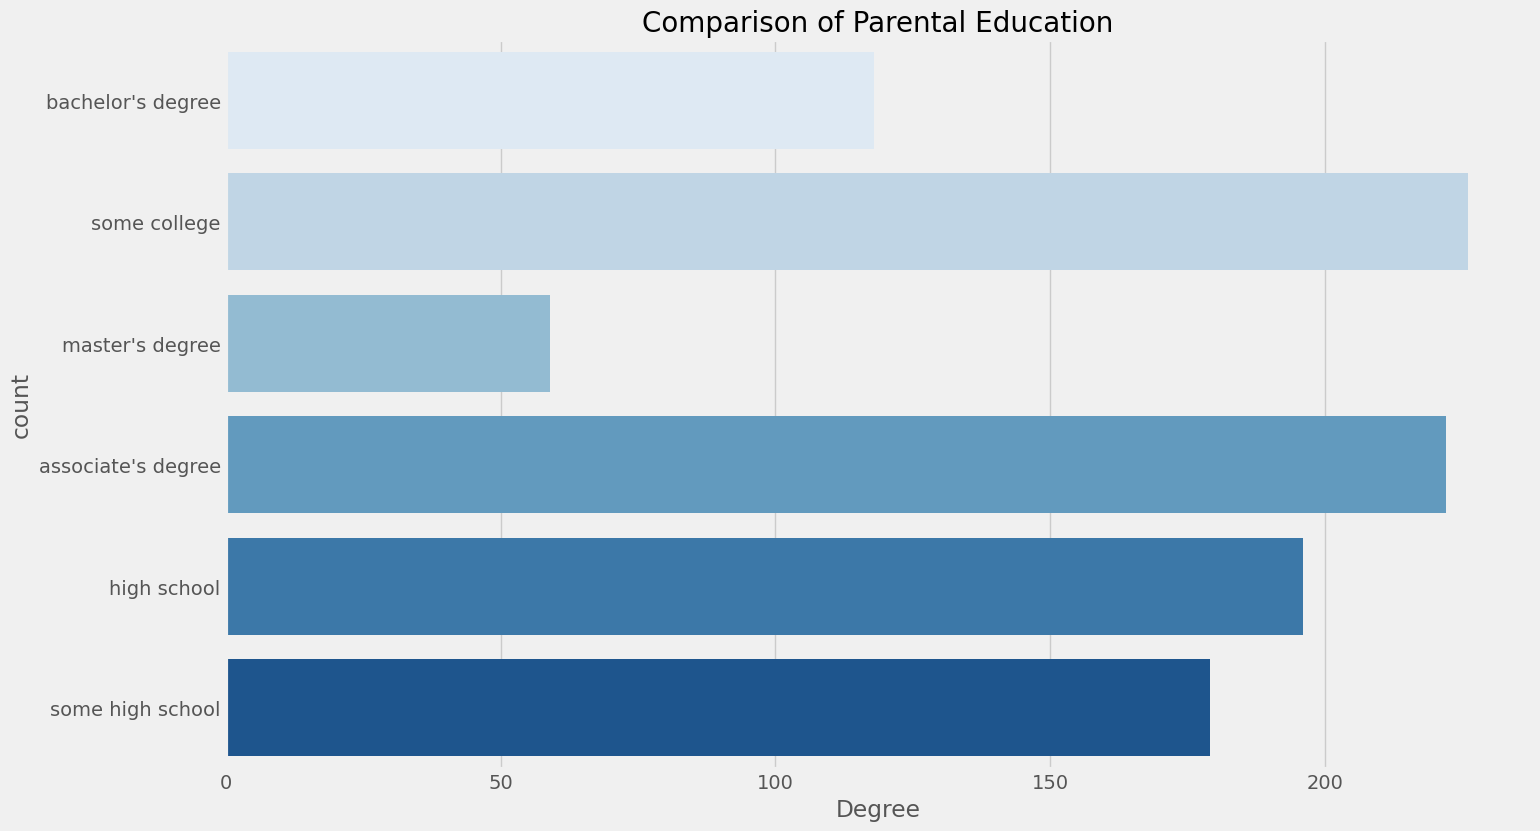

In [ ]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(data['parental level of education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

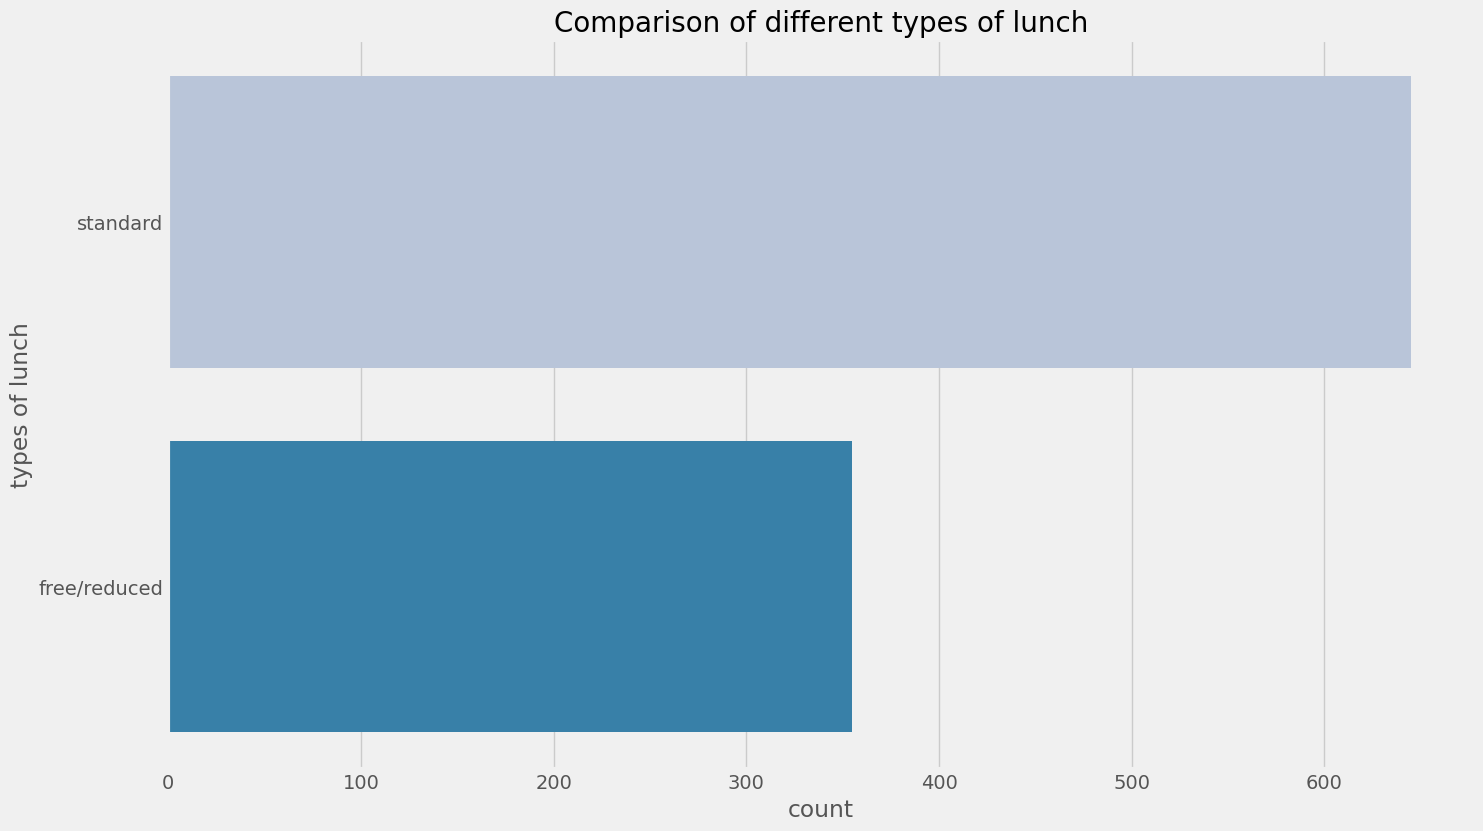

In [ ]:
plt.rcParams['figure.figsize'] = (15, 9)
sns.countplot(y='lunch', data=data, palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('count')
plt.ylabel('types of lunch')
plt.show()

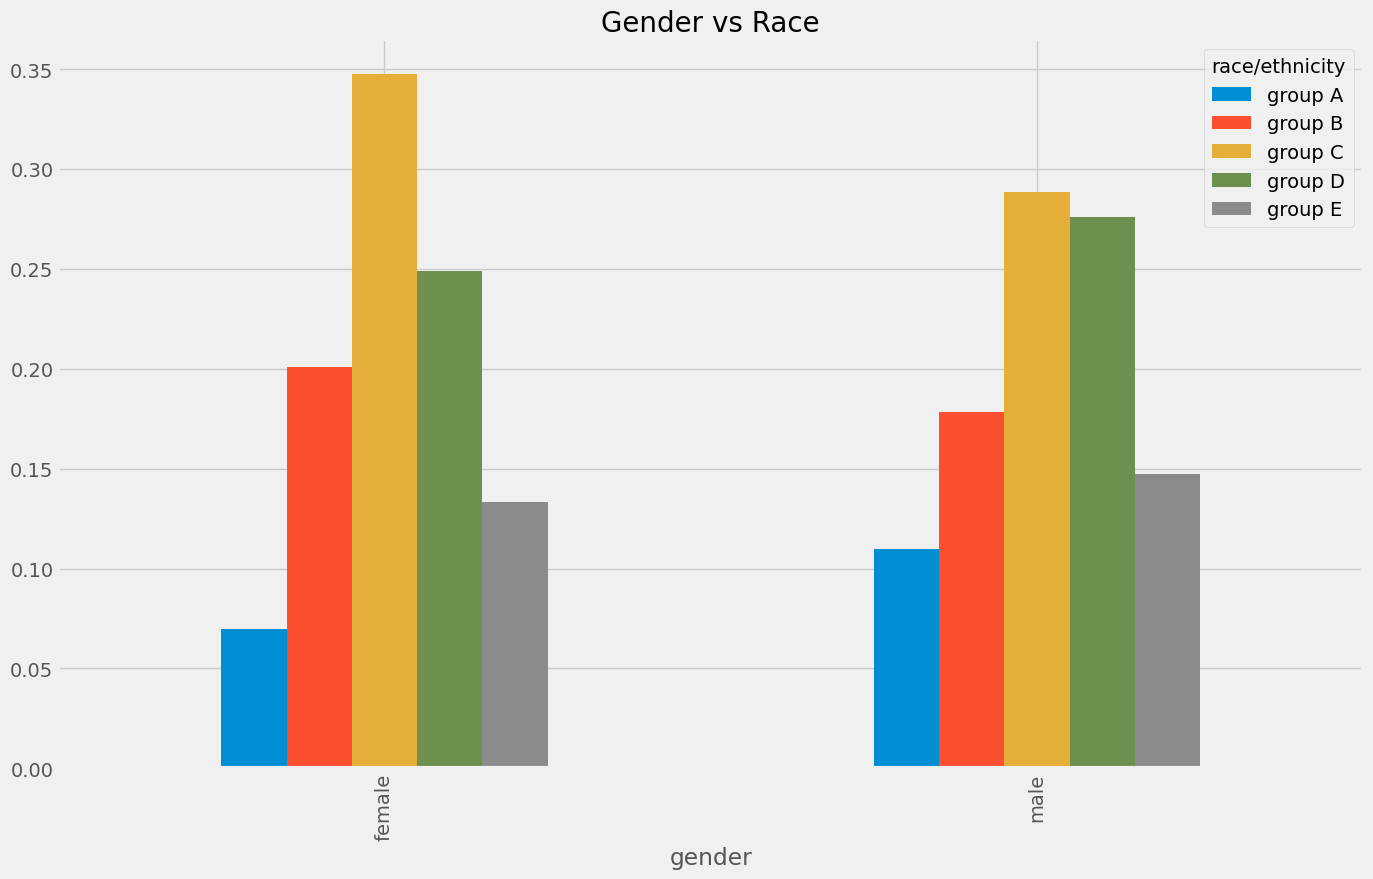

In [ ]:
plt.rcParams['figure.figsize'] = (15, 9)
x = pd.crosstab(data['gender'], data['race/ethnicity'])
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = False)
plt.title('Gender vs Race', fontweight = 30, fontsize = 20)
plt.show()

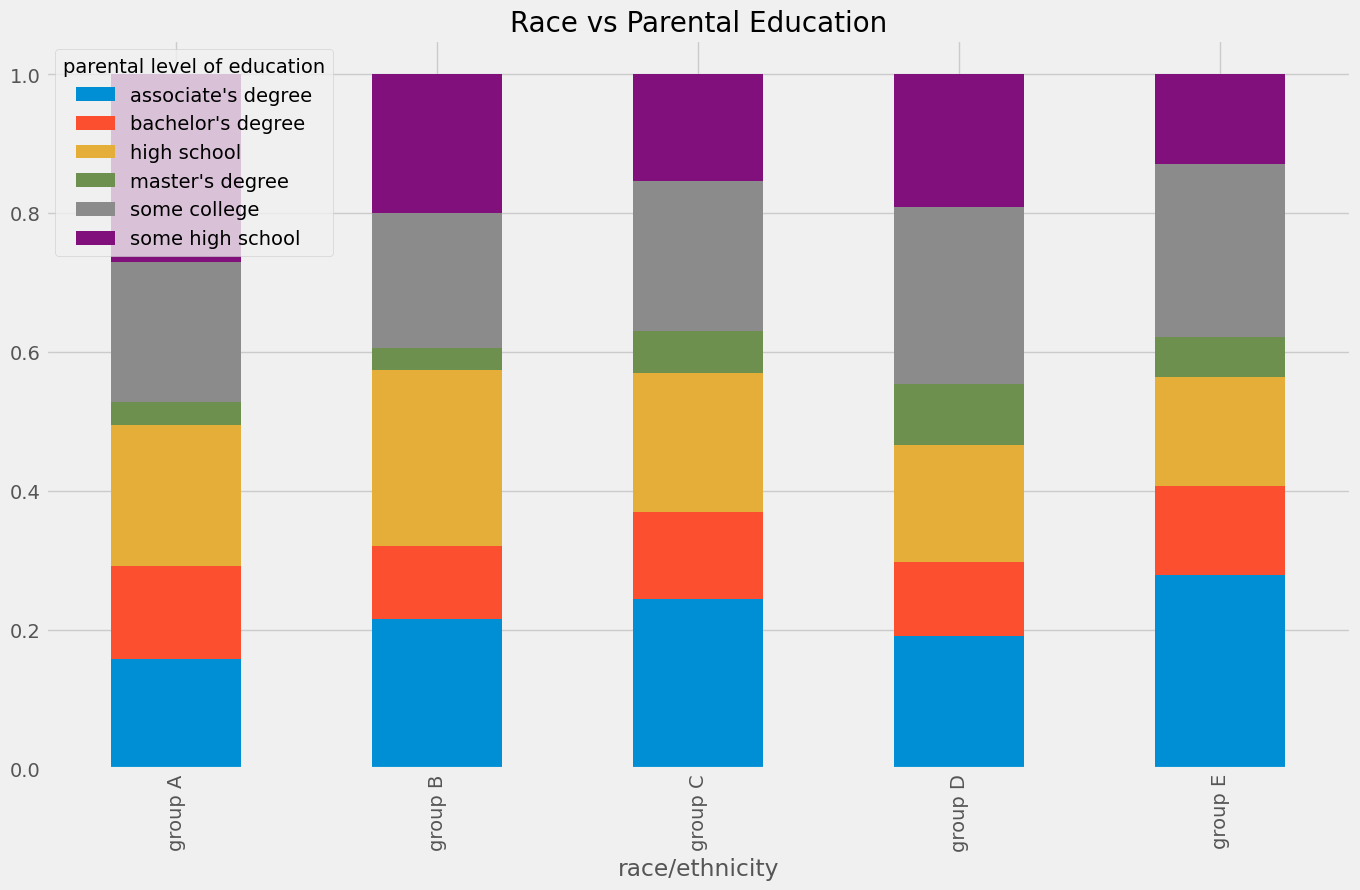

In [ ]:
plt.rcParams['figure.figsize'] = (15, 9)
x = pd.crosstab(data['race/ethnicity'], data['parental level of education'])
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = 'True')
plt.title('Race vs Parental Education', fontweight = 30, fontsize = 20)
plt.show()

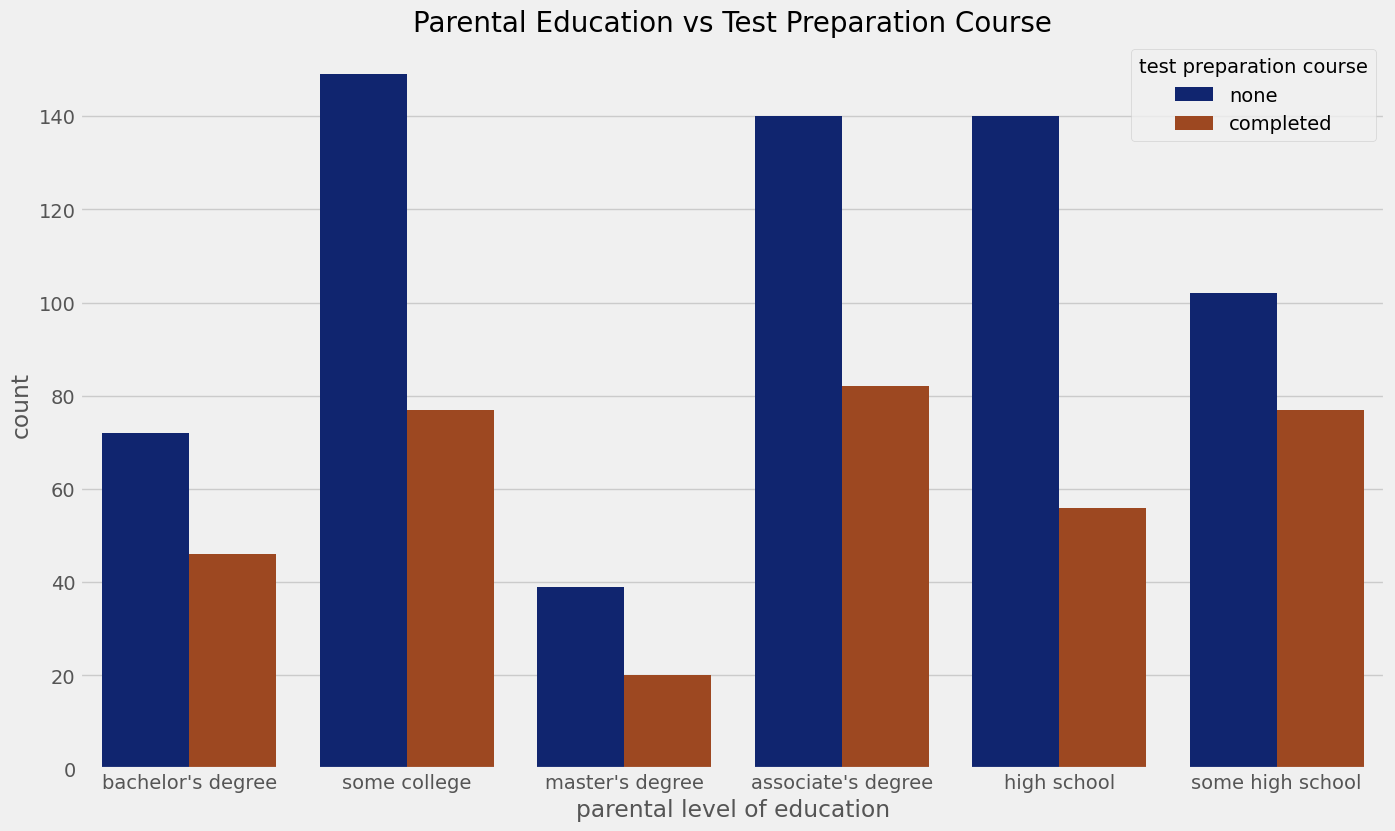

In [ ]:
plt.rcParams['figure.figsize'] = (15, 9)
sns.countplot(x = 'parental level of education', data = data, hue = 'test preparation course', palette = 'dark')
plt.title('Parental Education vs Test Preparation Course', fontweight = 30, fontsize = 20)
plt.show()

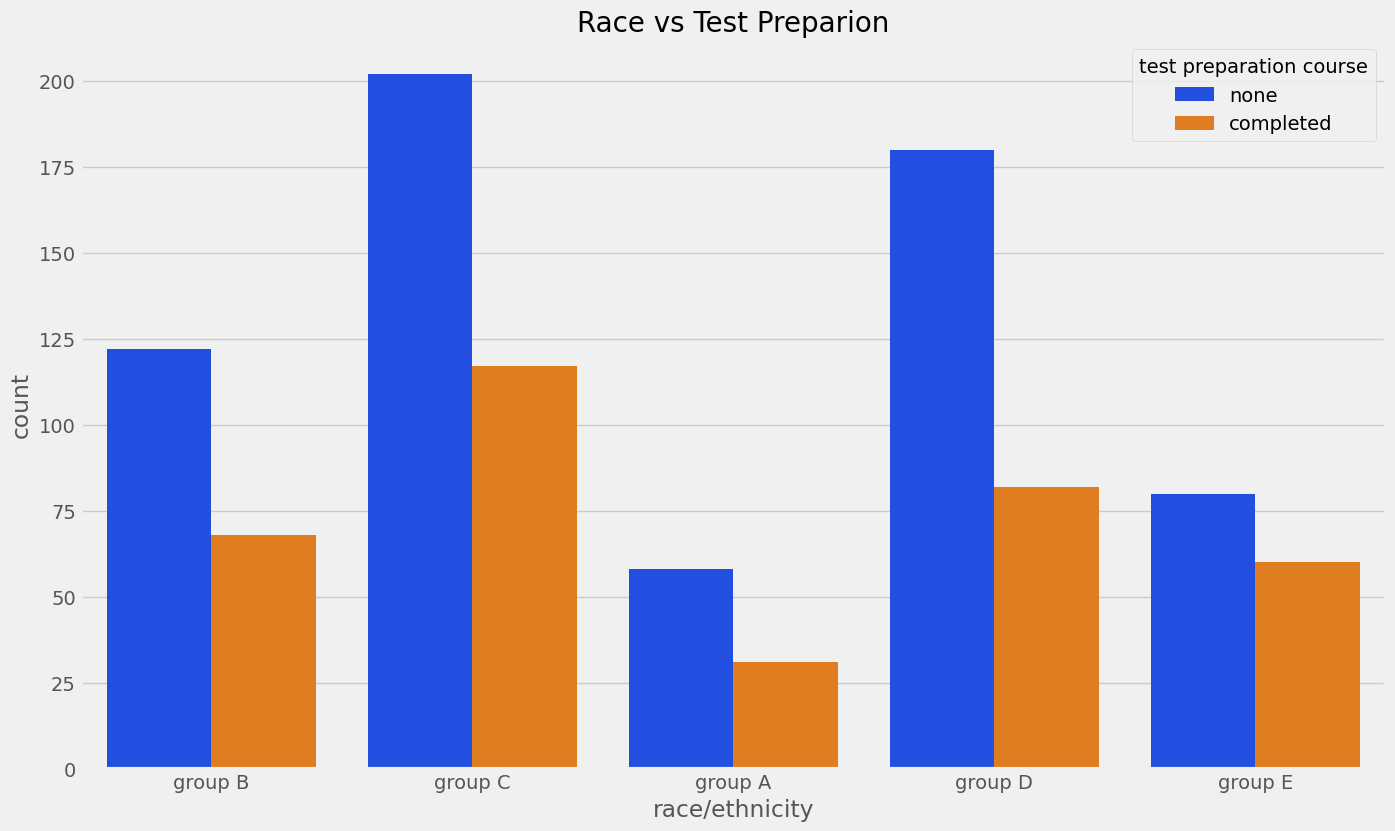

In [ ]:
sns.countplot(x = 'race/ethnicity', data = data,  hue = 'test preparation course', palette = 'bright')
plt.title('Race vs Test Preparion', fontweight = 30, fontsize = 20)
plt.show()

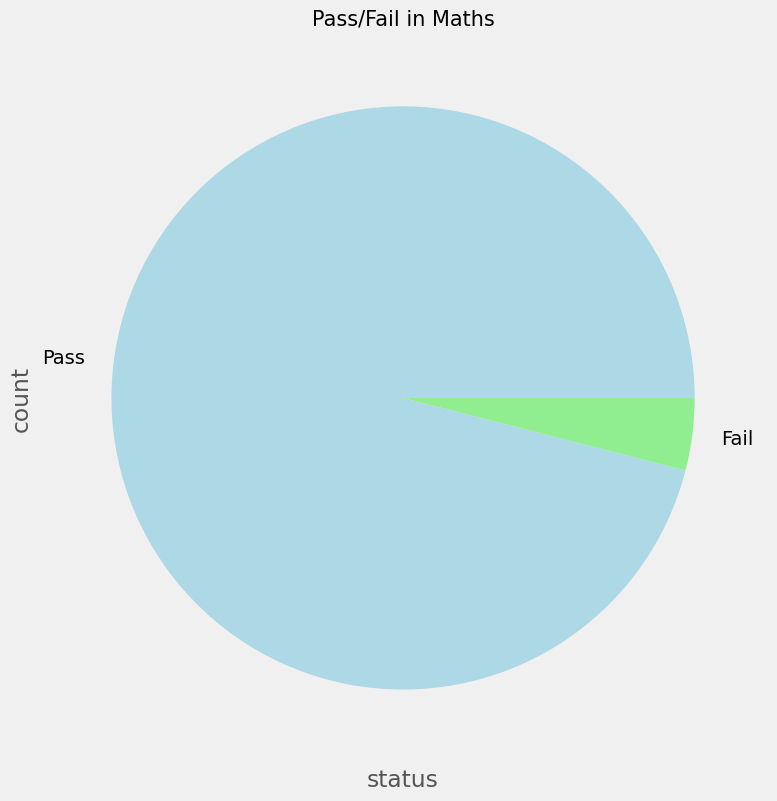

In [300]:
passmarks = 40
data['pass_math'] = np.where(data['math score']< passmarks, 'Fail', 'Pass')
data['pass_math'].value_counts().plot.pie(colors = ['lightblue', 'lightgreen'])
plt.title('Pass/Fail in Maths', fontweight = 20, fontsize = 15)
plt.xlabel('status')
plt.ylabel('count')
plt.show()

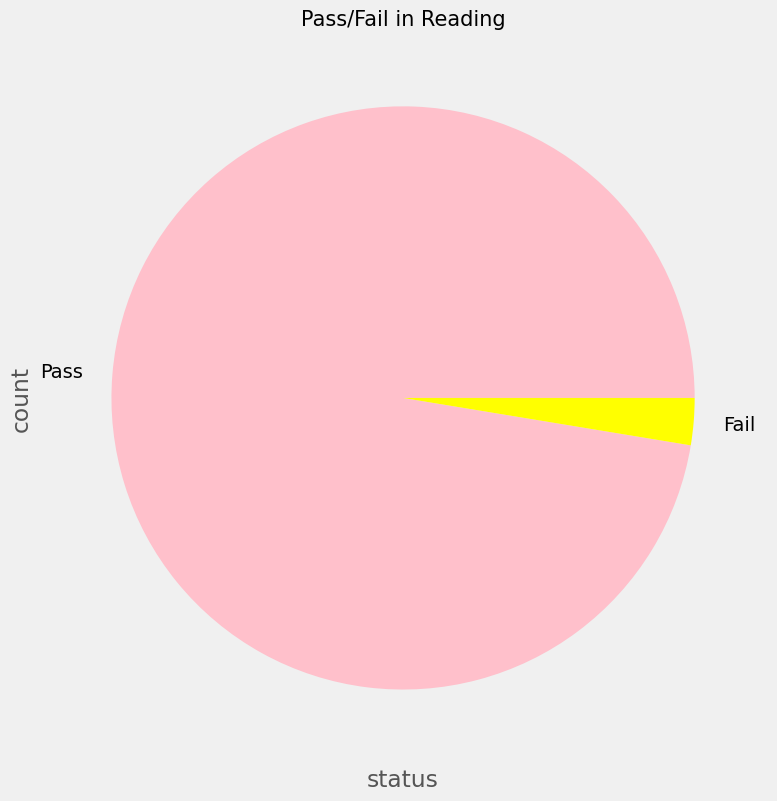

In [ ]:
data['pass_reading'] = np.where(data['reading score']< passmarks, 'Fail', 'Pass')
data['pass_reading'].value_counts(dropna = False).plot.pie(colors = ['pink', 'yellow'])

plt.title('Pass/Fail in Reading', fontweight = 20, fontsize = 15)
plt.xlabel('status')
plt.ylabel('count')
plt.show()

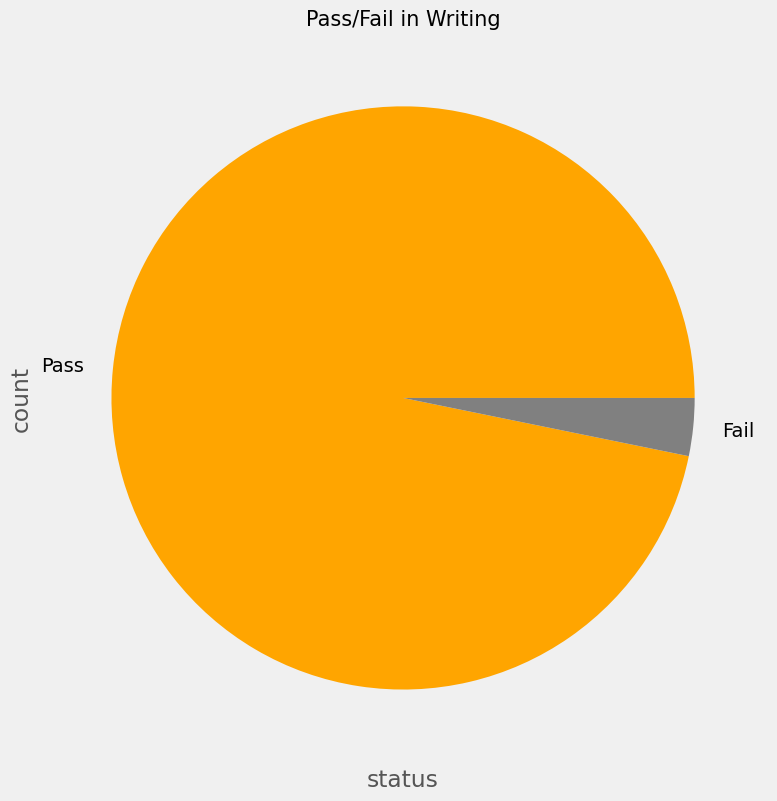

In [302]:
data['pass_writing'] = np.where(data['writing score']< passmarks, 'Fail', 'Pass')
data['pass_writing'].value_counts(dropna = False).plot.pie(colors = ['orange', 'gray'])
plt.title('Pass/Fail in Writing', fontweight = 20, fontsize = 15)
plt.xlabel('status')
plt.ylabel('count')
plt.show()

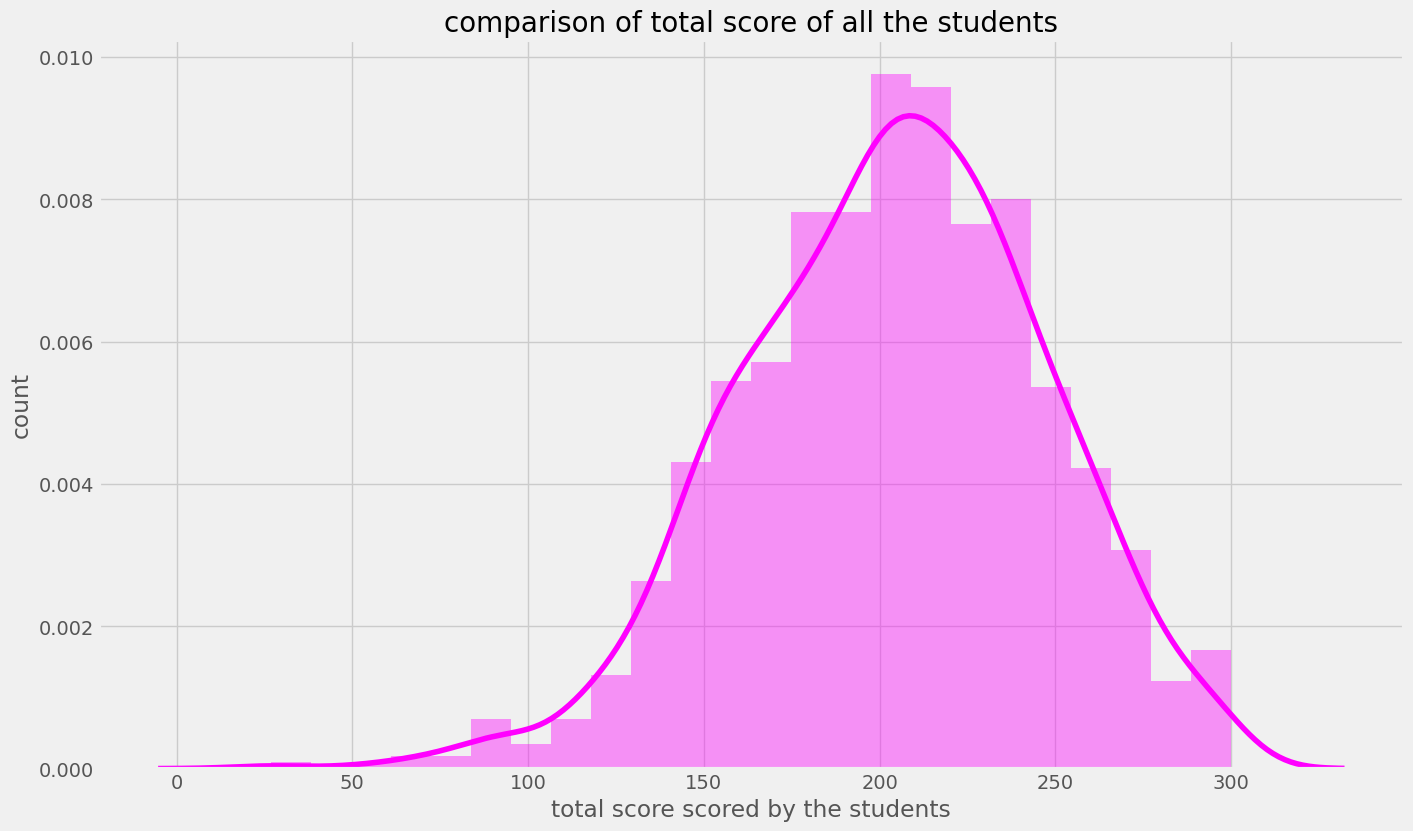

In [303]:
import warnings
warnings.filterwarnings('ignore')
data['total_score'] = data['math score'] + data['reading score'] + data['writing score']
sns.distplot(data['total_score'], color = 'magenta')
plt.title('comparison of total score of all the students', fontweight = 30, fontsize = 20)
plt.xlabel('total score scored by the students')
plt.ylabel('count')
plt.show()

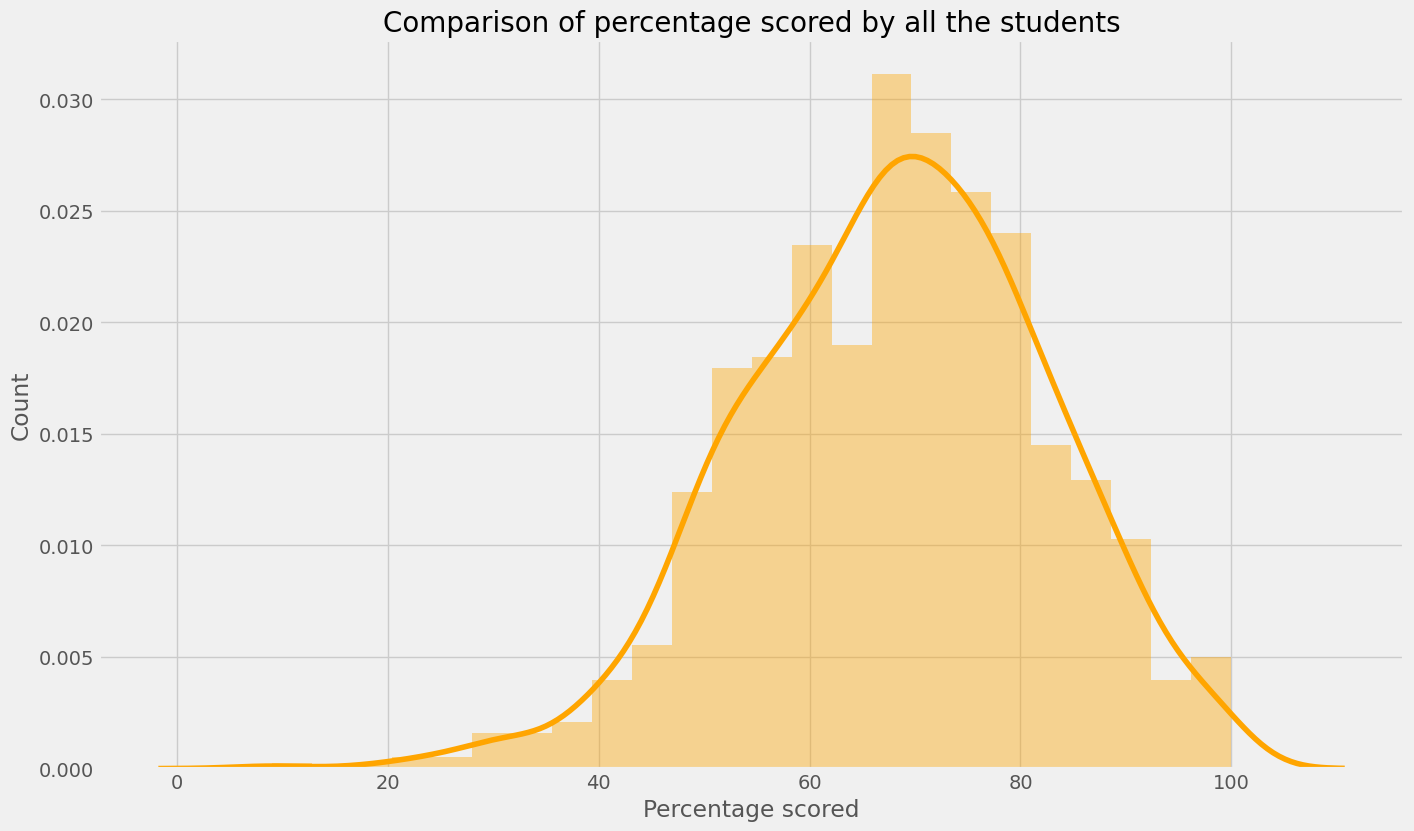

In [304]:
from math import *
import warnings
warnings.filterwarnings('ignore')
data['percentage'] = data['total_score']/3
for i in range(0, 1000):
    data['percentage'][i] = ceil(data['percentage'][i])
plt.rcParams['figure.figsize'] = (15, 9)
sns.distplot(data['percentage'], color = 'orange')
plt.title('Comparison of percentage scored by all the students', fontweight = 30, fontsize = 20)
plt.xlabel('Percentage scored')
plt.ylabel('Count')
plt.show()

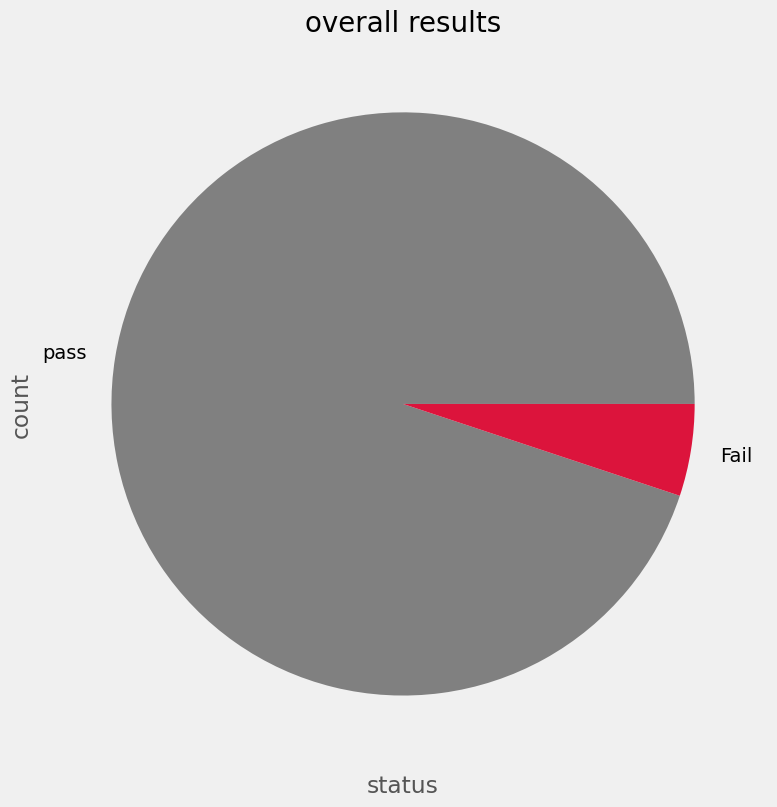

In [305]:
data['status'] = data.apply(lambda x : 'Fail' if x['pass_math'] == 'Fail' or
                           x['pass_reading'] == 'Fail' or x['pass_writing'] == 'Fail'
                           else 'pass', axis = 1)
data['status'].value_counts(dropna = False).plot.pie(colors = ['grey', 'crimson'])
plt.title('overall results', fontweight = 30, fontsize = 20)
plt.xlabel('status')
plt.ylabel('count')
plt.show()

In [306]:
# Assigning grades to the grades according to the following criteria :
# 0  - 40 marks : grade E
# 41 - 60 marks : grade D
# 60 - 70 marks : grade C
# 70 - 80 marks : grade B
# 80 - 90 marks : grade A
# 90 - 100 marks : grade O

def getgrade(percentage, status):
  if status == 'Fail':
    return 'E'
  if(percentage >= 90):
    return 'O'
  if(percentage >= 80):
    return 'A'
  if(percentage >= 70):
    return 'B'
  if(percentage >= 60):
    return 'C'
  if(percentage >= 40):
    return 'D'
  else :
    return 'E'

data['grades'] = data.apply(lambda x: getgrade(x['percentage'], x['status']), axis = 1 )

data['grades'].value_counts()

,count
grades,
B,260
C,252
D,223
A,156
O,58
E,51


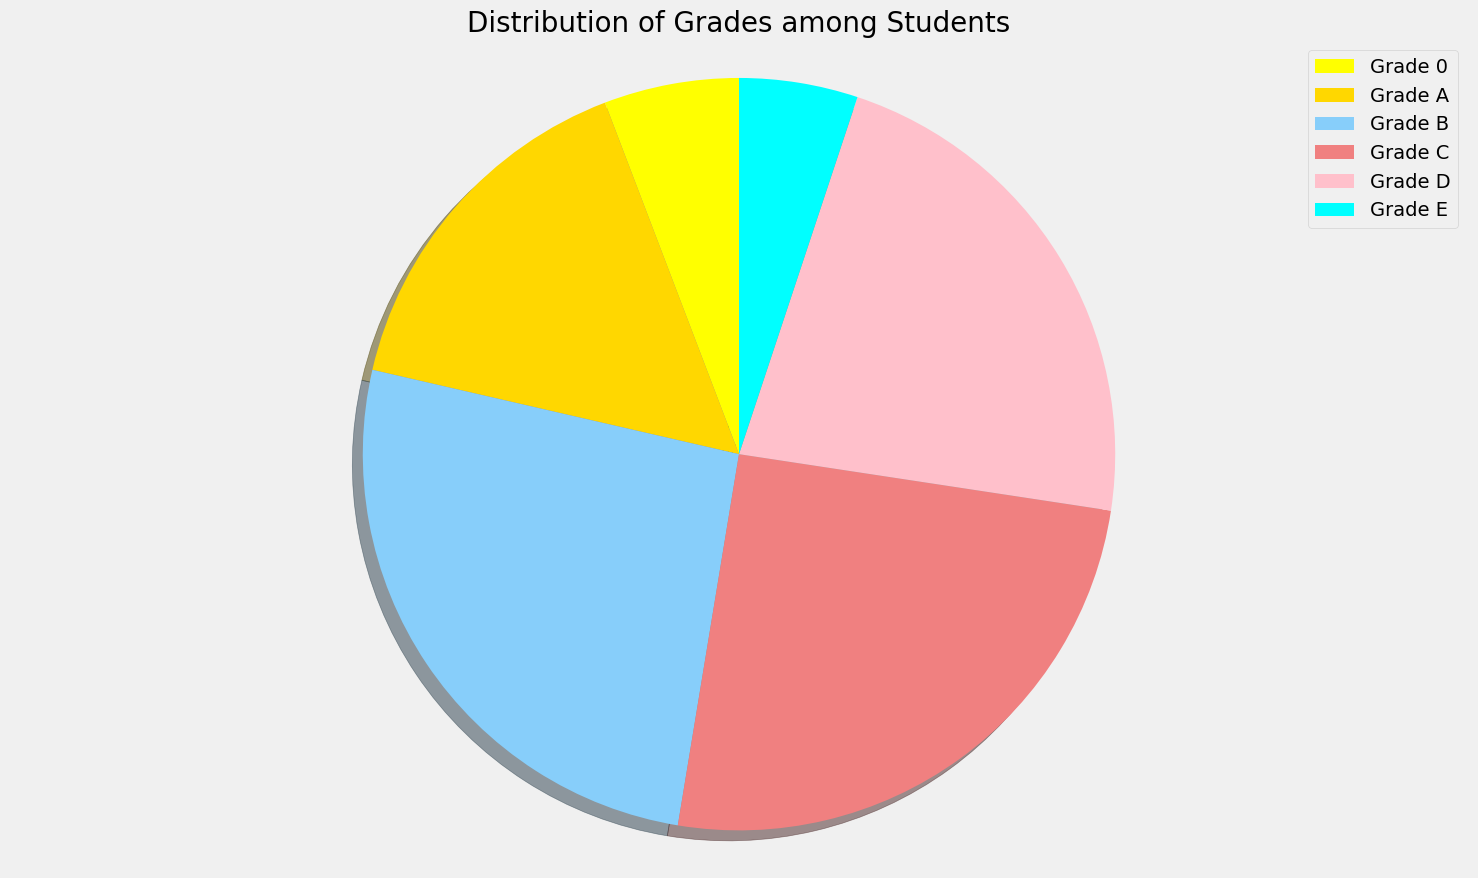

In [307]:
labels = ['Grade 0', 'Grade A', 'Grade B', 'Grade C', 'Grade D', 'Grade E']
sizes = [58, 156, 260, 252, 223, 51]
colors = ['yellow', 'gold', 'lightskyblue', 'lightcoral', 'pink', 'cyan']
explode = (0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001)

patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90)
plt.legend(patches, labels)
plt.title('Distribution of Grades among Students', fontweight = 30, fontsize = 20)
plt.axis('equal')
plt.tight_layout()
plt.show()

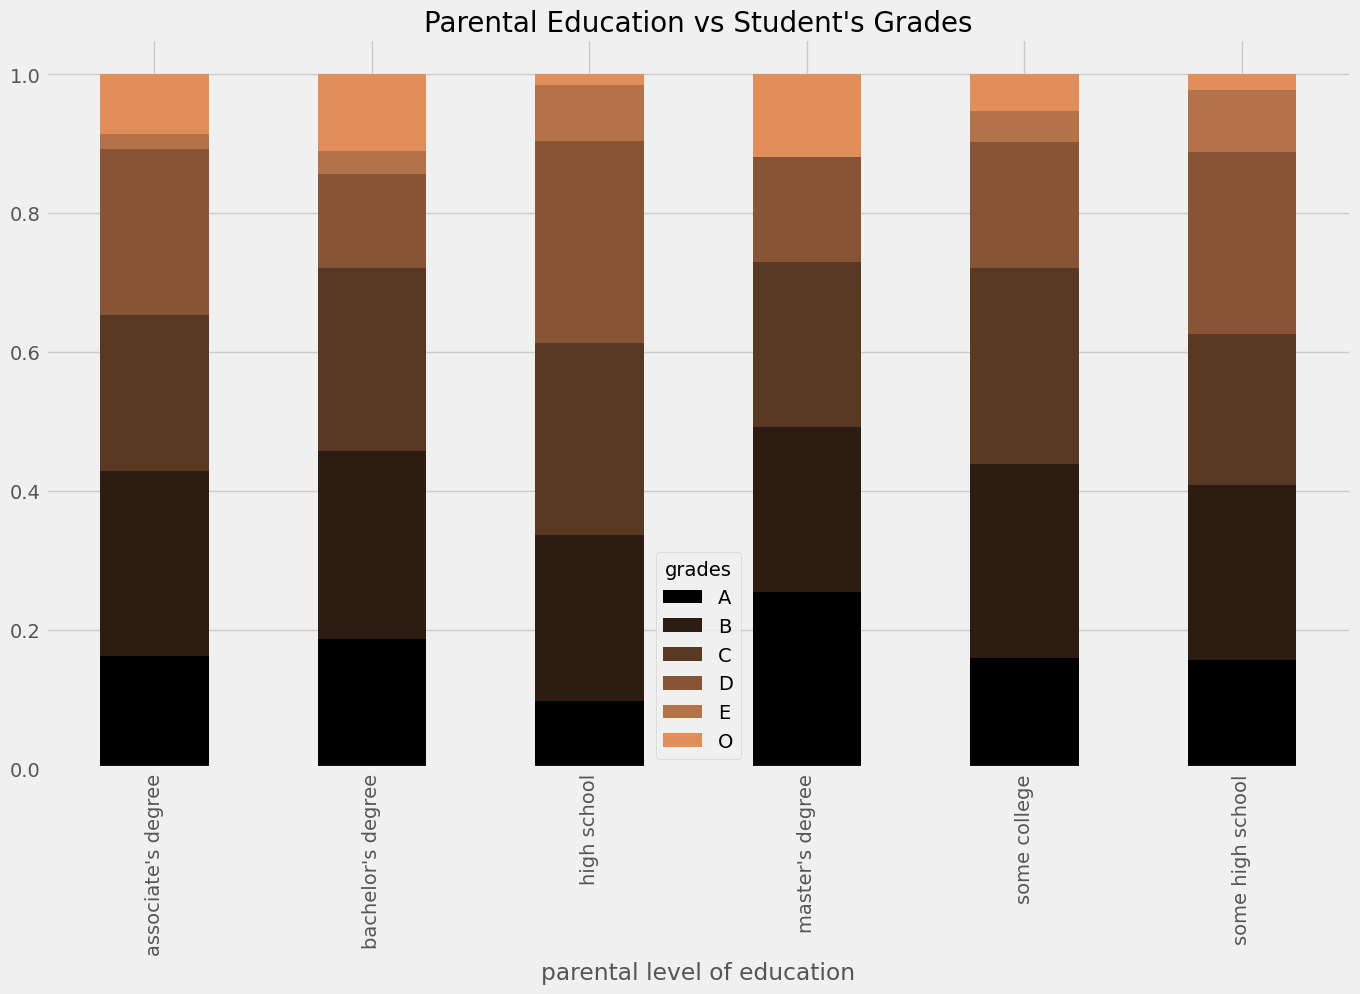

In [308]:
plt.rcParams['figure.figsize'] = (15, 9)
x = pd.crosstab(data['parental level of education'], data['grades'])
color = plt.cm.copper(np.linspace(0, 1, 8))
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, color = color)
plt.title("Parental Education vs Student's Grades", fontweight = 30, fontsize = 20)
plt.show()

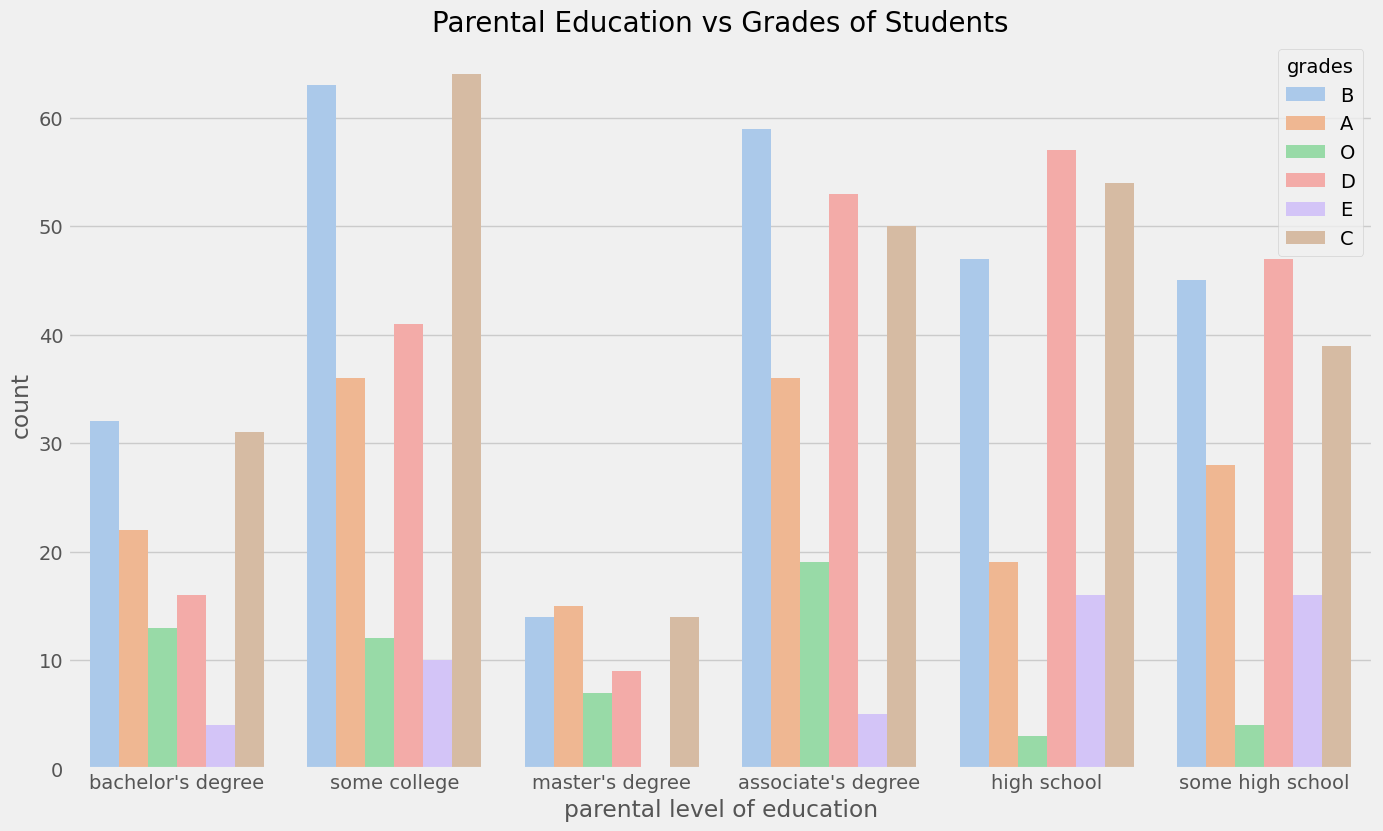

In [309]:
sns.countplot(x = data['parental level of education'], data = data, hue = data['grades'], palette = 'pastel')
plt.title('Parental Education vs Grades of Students', fontsize = 20, fontweight = 30)
plt.show()

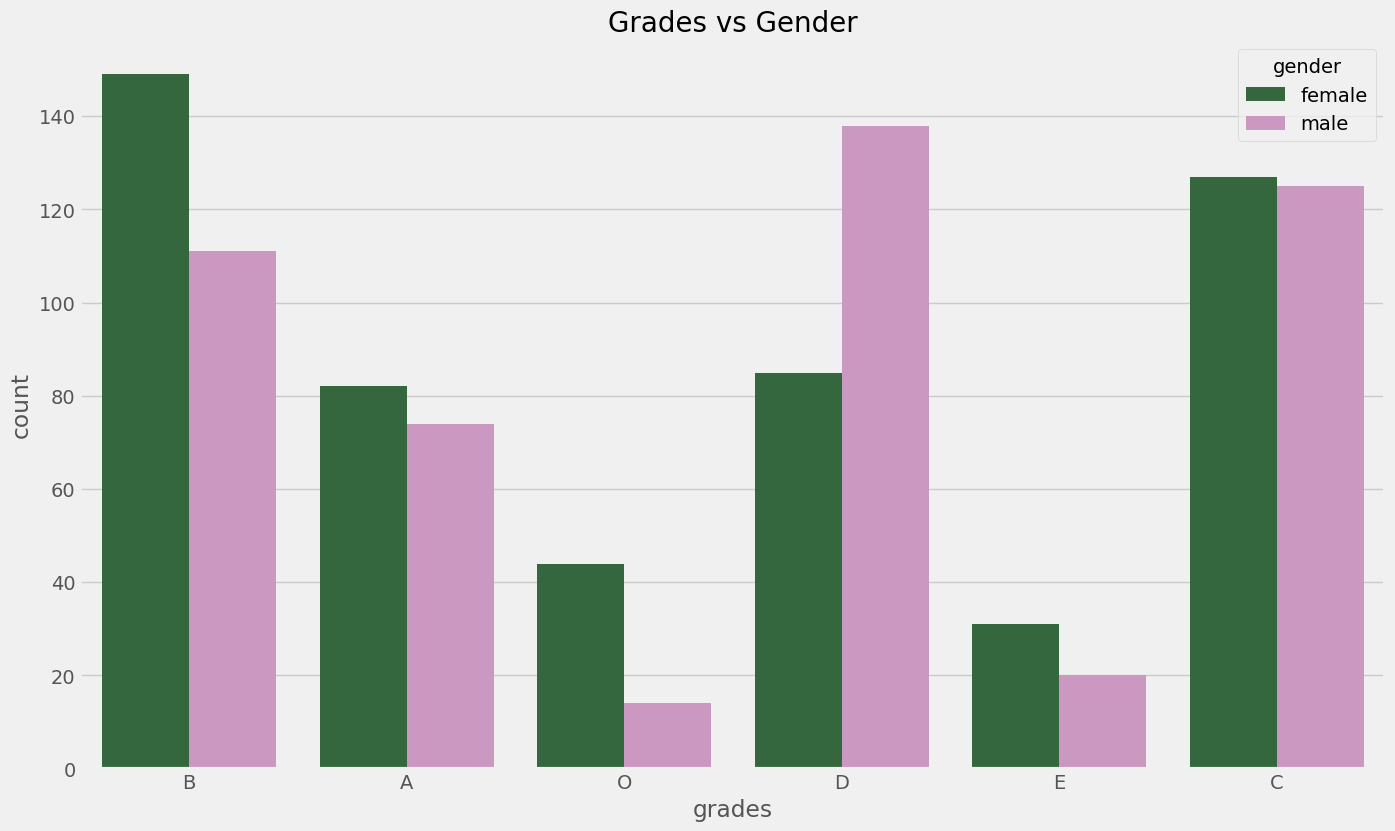

In [310]:
sns.countplot(x = data['grades'], data = data, hue = data['gender'], palette = 'cubehelix')
plt.title('Grades vs Gender', fontweight = 30, fontsize = 20)
plt.show()

## Label Encoding

In [311]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['test preparation course'] = le.fit_transform(data['test preparation course'])
data['lunch'] = le.fit_transform(data['lunch'])
data['race/ethnicity'] = data['race/ethnicity'].replace('group A', 1)
data['race/ethnicity'] = data['race/ethnicity'].replace('group B', 2)
data['race/ethnicity'] = data['race/ethnicity'].replace('group C', 3)
data['race/ethnicity'] = data['race/ethnicity'].replace('group D', 4)
data['race/ethnicity'] = data['race/ethnicity'].replace('group E', 5)
data['parental level of education'] = le.fit_transform(data['parental level of education'])
data['gender'] = le.fit_transform(data['gender'])
data['pass_math'] = le.fit_transform(data['pass_math'])
data['pass_reading'] = le.fit_transform(data['pass_reading'])
data['pass_writing'] = le.fit_transform(data['pass_writing'])
data['status'] = le.fit_transform(data['status'])

In [312]:
x = data.iloc[:,:14]
y = data.iloc[:,14]
print(x.shape)
print(y.shape)

(1000, 14)
(1000,)


In [313]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 45)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(750, 14)
(750,)
(250, 14)
(250,)


In [314]:
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()
x_train = mm.fit_transform(x_train)
x_test = mm.transform(x_test)


In [316]:
from sklearn.linear_model import  LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

Training Accuracy : 0.8546666666666667
Testing Accuracy : 0.812


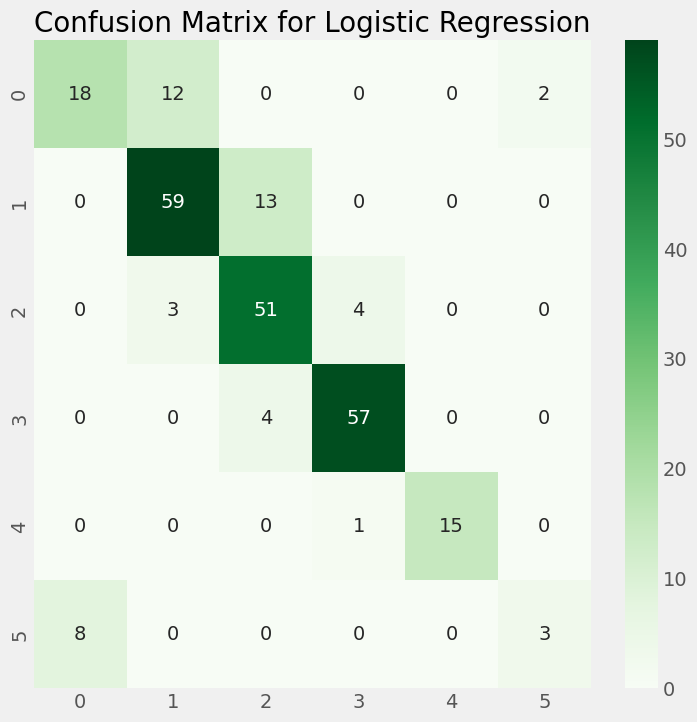

In [317]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (8, 8)
sns.heatmap(cm, annot = True, cmap = 'Greens')
plt.title('Confusion Matrix for Logistic Regression', fontweight = 30, fontsize = 20)
plt.show()

In [318]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

Training Accuracy : 1.0
Testing Accuracy : 1.0


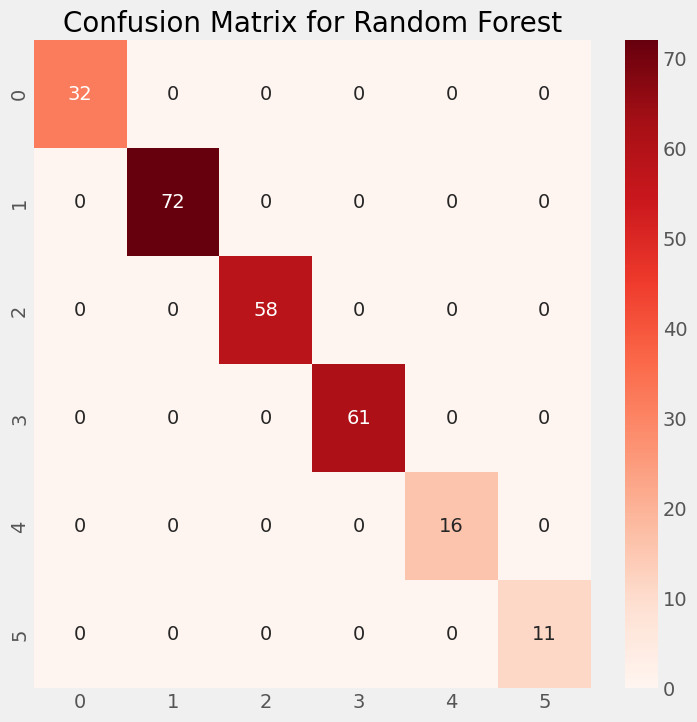

In [319]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (8, 8)
sns.heatmap(cm, annot = True, cmap = 'Reds')
plt.title('Confusion Matrix for Random Forest', fontweight = 30, fontsize = 20)
plt.show()

In [321]:
import pickle

filename = 'model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(model, file)

In [322]:
from sklearn.preprocessing import MinMaxScaler
scaler_filename = 'scaler.pkl'
with open(scaler_filename, 'wb') as file:
    pickle.dump(mm, file)

In [ ]:
import streamlit as st
import pickle
import numpy as np
import pandas as pd
with open('model.pkl', 'rb') as model_file:
    model = pickle.load(model_file)

with open('scaler.pkl', 'rb') as scaler_file:
    scaler = pickle.load(scaler_file)

def getgrade(percentage, status):
  if status == 'Fail':
    return 'E'
  if(percentage >= 90):
    return 'O'
  if(percentage >= 80):
    return 'A'
  if(percentage >= 70):
    return 'B'
  if(percentage >= 60):
    return 'C'
  if(percentage >= 40):
    return 'D'
  else :
    return 'E'

st.title("Student Performance Prediction")
st.write("Enter the student's details to predict their overall grade.")

gender = st.selectbox("Gender", ['female', 'male'])
race_ethnicity = st.selectbox("Race/Ethnicity", ['group A', 'group B', 'group C', 'group D', 'group E'])
parental_level_of_education = st.selectbox("Parental Level of Education", ["bachelor's degree", "some college", "master's degree", "associate's degree", "high school", "some high school"])
lunch = st.selectbox("Lunch", ['standard', 'free/reduced'])
test_preparation_course = st.selectbox("Test Preparation Course", ['none', 'completed'])
math_score = st.slider("Math Score", 0, 100)
reading_score = st.slider("Reading Score", 0, 100)
writing_score = st.slider("Writing Score", 0, 100)
gender_map = {'female': 0, 'male': 1}
race_ethnicity_map = {'group A': 1, 'group B': 2, 'group C': 3, 'group D': 4, 'group E': 5}
parental_education_map = {"bachelor's degree": 1, "some college": 4, "master's degree": 3, "associate's degree": 0, "high school": 2, "some high school": 5}
lunch_map = {'standard': 1, 'free/reduced': 0}
test_prep_map = {'none': 1, 'completed': 0}

passmarks = 40
pass_math = 1 if math_score >= passmarks else 0
pass_reading = 1 if reading_score >= passmarks else 0
pass_writing = 1 if writing_score >= passmarks else 0
total_score = math_score + reading_score + writing_score
percentage = np.ceil(total_score / 3)
status = 1 if pass_math == 1 and pass_reading == 1 and pass_writing == 1 else 0


if st.button("Predict Grade"):
    input_data = pd.DataFrame([[
        gender_map[gender],
        race_ethnicity_map[race_ethnicity],
        parental_education_map[parental_level_of_education],
        lunch_map[lunch],
        test_prep_map[test_preparation_course],
        math_score,
        reading_score,
        writing_score,
        pass_math,
        pass_reading,
        pass_writing,
        total_score,
        percentage,
        status
    ]],columns=['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'math score', 'reading score', 'writing score', 'pass_math', 'pass_reading', 'pass_writing', 'total_score', 'percentage', 'status'])
    scaled_input_data = scaler.transform(input_data)
    predicted_grade_encoded = model.predict(scaled_input_data)[0]
    grade_mapping = {
        3: 'B',
        2: 'C',
        5: 'D',
        0: 'A',
        1: 'O',
        4: 'E'
    }

    predicted_grade = grade_mapping.get(predicted_grade_encoded, 'Unknown')
    st.write(f"Predicted Grade: {predicted_grade}")

2025-09-12 15:43:50.570 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-12 15:43:50.571 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-12 15:43:50.574 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-12 15:43:50.575 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-12 15:43:50.576 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-12 15:43:50.577 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-12 15:43:50.578 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-12 15:43:50.578 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar